In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan

In [13]:
house_data = pd.read_csv("House Price Data.csv")

In [15]:
print("1. Data Structure:")

1. Data Structure:


In [17]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Houseid   198 non-null    int64  
 1   Price     198 non-null    float64
 2   Area      198 non-null    int64  
 3   Distance  198 non-null    float64
 4   Schools   198 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.9 KB
None


In [19]:
print("\nFirst 5 rows of the data:")


First 5 rows of the data:


In [21]:
print(house_data.head())

   Houseid  Price  Area  Distance  Schools
0        1  24.74  1036      3.22        2
1        2  20.15  1030      4.33        3
2        3  25.98  1046      1.94        3
3        4  20.10   950      2.45        2
4        5  23.03   952      2.47        2


In [25]:
X = house_data[["Area", "Distance", "Schools"]]

In [27]:
y = house_data["Price"] 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80/20 split

In [31]:
print("\n2. Training and Testing Data Sizes:")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


2. Training and Testing Data Sizes:
Training set size: 158
Testing set size: 40


In [33]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
print("\n3. Regression Model:")
print(model)


3. Regression Model:
LinearRegression()


In [41]:
X_train_sm = sm.add_constant(X_train)

In [43]:
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [45]:
print("\n4. Regression Summary (including p-values):")
print(ols_model.summary())


4. Regression Summary (including p-values):
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 03 May 2025   Prob (F-statistic):           6.08e-55
Time:                        21:26:39   Log-Likelihood:                -348.18
No. Observations:                 158   AIC:                             704.4
Df Residuals:                     154   BIC:                             716.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [49]:
print("\n4. Interpretation of Coefficients:")
print("---------------------------------------")
for i, col in enumerate(X_train.columns):
    coef = ols_model.params[i+1] # Get coefficient, skipping the constant
    p_value = ols_model.pvalues[i+1]
    print(f"Variable: {col}")
    print(f"  Coefficient: {coef:.4f}")  # Print coefficient to 4 decimal places
    print(f"  P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  The variable is statistically significant (p < 0.05).")
    else:
        print("  The variable is not statistically significant (p >= 0.05).")
    #Provide a basic interpretation
    if col == "Area":
        print("  For every one square foot increase in area, the selling price is expected to increase by approximately",round(coef,2),"million Rs, holding other variables constant.")
    elif col == "Distance":
        print("  For every one unit increase in distance from metro, the selling price is expected to change by approximately",round(coef,2),"million Rs, holding other variables constant.")
    elif col == "Schools":
        print("  For every one additional school within 2km, the selling price is expected to increase by approximately",round(coef,2),"million Rs, holding other variables constant.")


4. Interpretation of Coefficients:
---------------------------------------
Variable: Area
  Coefficient: 0.0343
  P-value: 0.0000
  The variable is statistically significant (p < 0.05).
  For every one square foot increase in area, the selling price is expected to increase by approximately 0.03 million Rs, holding other variables constant.
Variable: Distance
  Coefficient: -1.8737
  P-value: 0.0000
  The variable is statistically significant (p < 0.05).
  For every one unit increase in distance from metro, the selling price is expected to change by approximately -1.87 million Rs, holding other variables constant.
Variable: Schools
  Coefficient: 1.4379
  P-value: 0.0016
  The variable is statistically significant (p < 0.05).
  For every one additional school within 2km, the selling price is expected to increase by approximately 1.44 million Rs, holding other variables constant.


C:\Users\bahae\AppData\Local\Temp\ipykernel_12572\409025432.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = ols_model.params[i+1] # Get coefficient, skipping the constant
C:\Users\bahae\AppData\Local\Temp\ipykernel_12572\409025432.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = ols_model.pvalues[i+1]


In [51]:
r_squared = ols_model.rsquared
adjusted_r_squared = ols_model.rsquared_adj

print("\n5. R-squared and Adjusted R-squared:")
print(f"R-squared: {r_squared:.4f}")  # Print R-squared
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")  # Print Adjusted R-squared

print("\n5. Interpretation:")
print("-------------------")
print(f"The R-squared value of {r_squared:.4f} indicates that approximately {r_squared * 100:.2f}% of the variance in the selling price is explained by the model.")
print(f"The adjusted R-squared value of {adjusted_r_squared:.4f} is a more conservative estimate, accounting for the number of predictors in the model.")


5. R-squared and Adjusted R-squared:
R-squared: 0.8079
Adjusted R-squared: 0.8042

5. Interpretation:
-------------------
The R-squared value of 0.8079 indicates that approximately 80.79% of the variance in the selling price is explained by the model.
The adjusted R-squared value of 0.8042 is a more conservative estimate, accounting for the number of predictors in the model.


In [53]:
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("\n6. Multicollinearity Check (VIF):")
print(vif)

#Check correlation
correlation_matrix = X_train.corr()
print("\n6. Correlation Matrix:")
print(correlation_matrix)


6. Multicollinearity Check (VIF):
   Variable        VIF
0      Area  53.668601
1  Distance   6.277767
2   Schools  40.838649

6. Correlation Matrix:
              Area  Distance   Schools
Area      1.000000 -0.031807  0.634396
Distance -0.031807  1.000000 -0.195271
Schools   0.634396 -0.195271  1.000000


In [55]:
print("\n6. Interpretation of Multicollinearity:")
print("---------------------------------------")
if any(vif["VIF"] > 5): #Common threshold
    print("There is evidence of multicollinearity.  Consider removing variables with high VIF values or combining them.")
else:
    print("There is no significant multicollinearity detected.")


6. Interpretation of Multicollinearity:
---------------------------------------
There is evidence of multicollinearity.  Consider removing variables with high VIF values or combining them.


In [57]:
influence = ols_model.get_influence()
cooks_d = influence.cooks_distance[0]  # Cook's distance values
n = len(X_train)
p = X_train.shape[1] + 1  # Number of predictors + 1 (for the constant)
cooks_threshold = 4 / n
print(f"\n7. Cook's Distance Threshold: {cooks_threshold:.4f}")
print("\n7. Influential Observations (Cook's Distance):")
influential_points = np.where(cooks_d > cooks_threshold)[0]
if (len(influential_points) > 0):
  print(influential_points)
else:
  print("No influential observations detected using Cook's distance")


7. Cook's Distance Threshold: 0.0253

7. Influential Observations (Cook's Distance):
[  6  23  24  27  51  62  65  97 103 109 115 116 125 140 141 145 149]


In [59]:
residuals = ols_model.resid
shapiro_test = shapiro(residuals)

print("\n8. Normality of Errors (Shapiro-Wilk Test):")
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}")
print(f"P-value: {shapiro_test.pvalue:.4f}")

print("\n8. Interpretation of Normality:")
print("------------------------------")
if shapiro_test.pvalue < 0.05:
    print("The errors are not normally distributed (p < 0.05).")
else:
    print("The errors appear to be normally distributed (p >= 0.05).")


8. Normality of Errors (Shapiro-Wilk Test):
Shapiro-Wilk Test Statistic: 0.9605
P-value: 0.0002

8. Interpretation of Normality:
------------------------------
The errors are not normally distributed (p < 0.05).


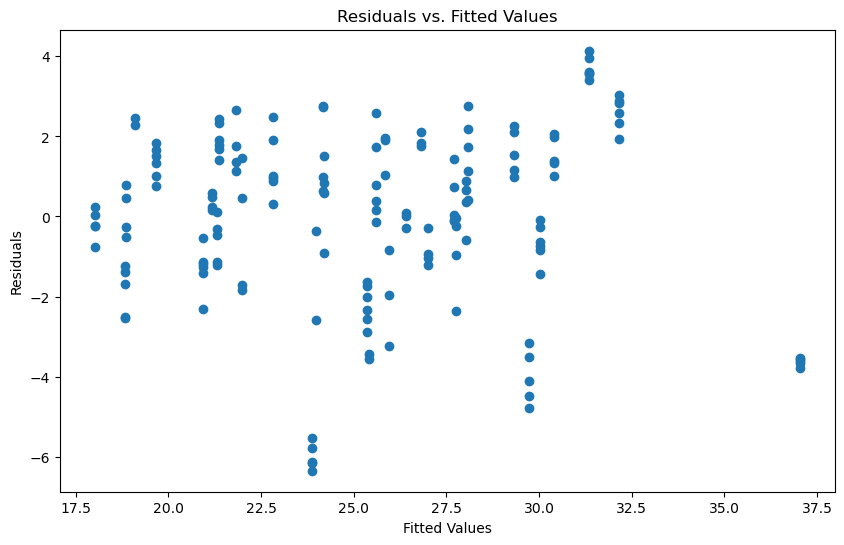


9. Heteroscedasticity Check (Breusch-Pagan Test):
Breusch-Pagan Test Statistic: 30.9262
P-value: 0.0000

9. Interpretation of Heteroscedasticity:
---------------------------------------
There is evidence of heteroscedasticity (p < 0.05). The variance of the errors is not constant.


In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(ols_model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

bp_test = het_breuschpagan(residuals, X_train_sm)
print("\n9. Heteroscedasticity Check (Breusch-Pagan Test):")
print(f"Breusch-Pagan Test Statistic: {bp_test[0]:.4f}")
print(f"P-value: {bp_test[1]:.4f}")

print("\n9. Interpretation of Heteroscedasticity:")
print("---------------------------------------")
if bp_test[1] < 0.05:
    print("There is evidence of heteroscedasticity (p < 0.05). The variance of the errors is not constant.")
else:
    print("There is no significant heteroscedasticity detected (p >= 0.05). The variance of the errors appears to be constant.")

In [63]:
y_train_pred = ols_model.predict(X_train_sm)  # Predict on training data
y_test_pred = model.predict(X_test)  # Predict on test data

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n10. RMSE (Root Mean Squared Error):")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")


10. RMSE (Root Mean Squared Error):
Training RMSE: 2.1919
Testing RMSE: 2.2308
